(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

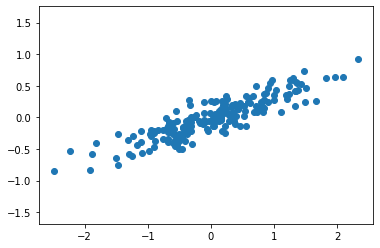

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#pca를 위한 자료준비
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

In [6]:
from sklearn.decomposition import PCA

mypca = PCA(n_components = 2)
mypca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
print(mypca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print(mypca.explained_variance_)

[0.7625315 0.0184779]


In [12]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops = dict(
      color='red'
      ,arrowstyle = 'simple'
      ,linewidth=2
      ,shrinkA=0, shrinkB=0
  )
  ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

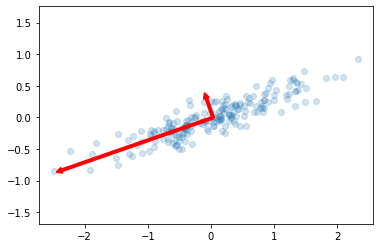

In [13]:
#data plotting
plt.scatter(X[:,0], X[:, 1], alpha=0.2)
for length, vector in zip(mypca.explained_variance_, mypca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(mypca.mean_, mypca.mean_+v)
plt.axis('equal')

In [14]:
dimpca = PCA(n_components=1)
dimpca.fit(X)
X_pca = dimpca.transform(X)
print('original shape : ', X.shape)
print('transformed shape : ', X_pca.shape)

original shape :  (200, 2)
transformed shape :  (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

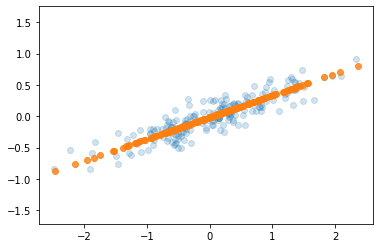

In [16]:
# 역변환
X_new = dimpca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha = 0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal')

In [20]:
# 고유 얼굴 성분 찾기
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(face.target_names)
print(face.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [21]:
from sklearn.decomposition import PCA
face_pca=PCA(150)
face_pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

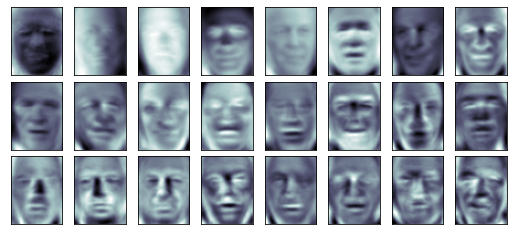

In [22]:
fig, axes = plt.subplots(3,8, figsize=(9,4)
                          , subplot_kw={'xticks':[], 'yticks':[]}
                         , gridspec_kw=dict(hspace=0.1, wspace=0.1)
                    )
for i, ax in enumerate(axes.flat):
  ax.imshow(face_pca.components_[i].reshape(62,47),cmap='bone')